In [3]:
# Author Stefano Carrazza
# includes
import lhapdf
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.font_manager import FontProperties
import numpy as np
import math
import pylab

In [4]:
# define the correlation between 2 pdfs
def correlation(x1, x2, q, fl1, fl2, pdf):
    nrep = len(pdf)-1
    a = b = ab = sq_a = sq_b = 0.0
    for r in range(0,nrep):
        v1 = pdf[r+1].xfxQ(fl1, x1, q)
        v2 = pdf[r+1].xfxQ(fl2, x2, q)
        ab += v1*v2
        a  += v1
        b  += v2
        sq_a += v1*v1
        sq_b += v2*v2
    a /= nrep
    b /= nrep
    ab /= nrep
    sig1 = math.sqrt(sq_a/(nrep-1.0) - nrep/(nrep-1.0)*a*a)
    sig2 = math.sqrt(sq_b/(nrep-1.0) - nrep/(nrep-1.0)*b*b)
    
    return nrep/(nrep-1.0)*(ab-a*b)/(sig1*sig2)

# define the correlation between 2 pdfs
def correlationHessian(x1, x2, q, fl1, fl2, pdf):
    nrep = len(pdf)-1
    ab = sq_a = sq_b = 0.0
    for r in range(0,nrep/2):
        v1 = pdf[2*r+1].xfxQ(fl1, x1, q)-pdf[2*r+2].xfxQ(fl1, x1, q)
        v2 = pdf[2*r+1].xfxQ(fl2, x2, q)-pdf[2*r+2].xfxQ(fl2, x2, q)
        ab += v1*v2        
        sq_a += v1**2
        sq_b += v2**2
        
    sig1 = math.sqrt(sq_a)
    sig2 = math.sqrt(sq_b)
    
    return ab/(sig1*sig2)

# define the correlation between 2 pdfs
def correlationHessianSym(x1, x2, q, fl1, fl2, pdf):
    nrep = len(pdf)-1
    ab = sq_a = sq_b = 0.0
    for r in range(0,nrep):
        v1 = pdf[r+1].xfxQ(fl1, x1, q)-pdf[0].xfxQ(fl1, x1, q)
        v2 = pdf[r+1].xfxQ(fl2, x2, q)-pdf[0].xfxQ(fl2, x2, q)
        ab += v1*v2        
        sq_a += v1**2
        sq_b += v2**2
        
    sig1 = math.sqrt(sq_a)
    sig2 = math.sqrt(sq_b)
    
    return ab/(sig1*sig2)

In [5]:
# Loading the prior
pset = lhapdf.getPDFSet("MC900_nnlo")
prior = []
pindex = []
for i in range(0,pset.size): prior.append(pset.mkPDF(i))
for i in range(1,pset.size): pindex.append(i)

pset2 = lhapdf.getPDFSet("CMCPDFcomb_nnlo_compressed_40")
prior2 = []    
pindex2 = []
for i in range(0,pset2.size): prior2.append(pset2.mkPDF(i))
for i in range(1,pset2.size): pindex2.append(i)
    
pset3 = lhapdf.getPDFSet("METAv2E50")
prior3 = []    
pindex3 = []
for i in range(0,pset3.size): prior3.append(pset3.mkPDF(i))
for i in range(1,pset3.size): pindex3.append(i)    
    
pset4 = lhapdf.getPDFSet("mcmeta2")
prior4 = []    
pindex4 = []
for i in range(0,pset4.size): prior4.append(pset4.mkPDF(i))
for i in range(1,pset4.size): pindex4.append(i)    
    
    
pset5 = lhapdf.getPDFSet("CMCPDFcomb_nnlo_hessian")
prior5 = []    
pindex5 = []
for i in range(0,pset5.size): prior5.append(pset5.mkPDF(i))
for i in range(1,pset5.size): pindex5.append(i) 
    
pset6 = lhapdf.getPDFSet("MCH_nnlo_100")
prior6 = []    
pindex6 = []
for i in range(0,pset6.size): prior6.append(pset6.mkPDF(i))
for i in range(1,pset6.size): pindex6.append(i) 

In [10]:
# x points
x = np.logspace(math.log(1e-5), math.log(0.7), num=50, base=math.exp(1))
q = 8

M1 = np.zeros(shape=(x.size,x.size))
M2 = np.zeros(shape=(x.size,x.size))
M3 = np.zeros(shape=(x.size,x.size))
M4 = np.zeros(shape=(x.size,x.size))
M5 = np.zeros(shape=(x.size,x.size))
M6 = np.zeros(shape=(x.size,x.size))

f1 = -2
f2 = 2
for i in range(x.size):        
    for j in range(x.size):
        M1[i,j] = correlation(x[i], x[j], q, f1, f2, prior)        
        M2[i,j] = correlation(x[i], x[j], q, f1, f2, prior2)    
        M3[i,j] = correlationHessian(x[i], x[j], q, f1, f2, prior3)    
        M4[i,j] = correlation(x[i], x[j], q, f1, f2, prior4)    
        M5[i,j] = correlationHessianSym(x[i], x[j], q, f1, f2, prior5)     
        M6[i,j] = correlationHessianSym(x[i], x[j], q, f1, f2, prior6)        

"\nplt.figure()\nplt.imshow(M2.T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-1, vmax=1)\nplt.xscale('log')\nplt.yscale('log')\nplt.title(r'$\rho(\x08ar{d},g)$ for CMC40 @ 8 GeV')\nplt.colorbar()\nplt.xlabel('x log scale')\nplt.ylabel('x log scale')\nplt.savefig('cmc40dbarg.eps')\n\n\nM = M2-M1\nplt.figure()\nplt.imshow(M.T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-0.2, vmax=0.2)\nplt.title(r'$\rho(\x08ar{d},g)$ for CMC40-CMC300 @ 8 GeV')\nplt.colorbar()\nplt.xscale('log')\nplt.yscale('log')\nplt.xlabel('x log scale')\nplt.ylabel('x log scale')\nplt.savefig('cmc40-300dbarg-zoom.eps')\n"

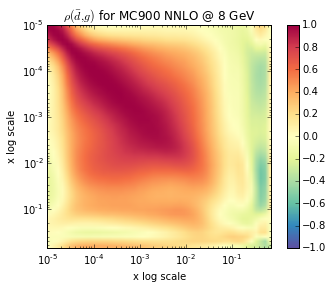

In [11]:
import palettable
cm = palettable.colorbrewer.diverging.Spectral_11_r.mpl_colormap
#plt.rcParams['figure.figsize'] = (16,9)

plt.imshow(M1.T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-1, vmax=1, cmap=cm)
plt.colorbar()
plt.title(r'$\rho(\bar{d},g)$ for MC900 NNLO @ 8 GeV')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('cmc900dbarg.eps')

"""
plt.figure()
plt.imshow(M2.T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-1, vmax=1)
plt.xscale('log')
plt.yscale('log')
plt.title(r'$\rho(\bar{d},g)$ for CMC40 @ 8 GeV')
plt.colorbar()
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('cmc40dbarg.eps')


M = M2-M1
plt.figure()
plt.imshow(M.T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-0.2, vmax=0.2)
plt.title(r'$\rho(\bar{d},g)$ for CMC40-CMC300 @ 8 GeV')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('cmc40-300dbarg-zoom.eps')
"""

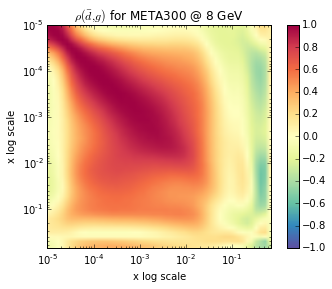

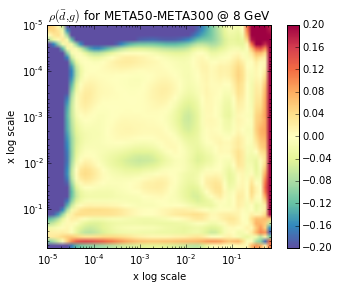

In [16]:
plt.figure()
plt.imshow(M4.T, extent=[x[0], x[-1], x[-1], x[0]], vmin=-1, vmax=1, cmap=cm)
plt.title(r'$\rho(\bar{d},g)$ for META300 @ 8 GeV')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('meta300dbarg.eps')
"""
plt.figure()
plt.imshow((M4-M1).T, extent=[x[0], x[-1], x[-1], x[0]], vmin=-0.2, vmax=0.2)
plt.title(r'$\rho(\bar{d},g)$ for META300-CMC900 @ 8 GeV')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('meta300-cmc900-dbarg-zoom.eps')


plt.figure()
plt.imshow(M3.T, extent=[x[0], x[-1], x[-1], x[0]], vmin=-1, vmax=1)
plt.title(r'$\rho(\bar{d},g)$ for META50 (s4test50) @ 8 GeV')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('meta50dbarg.eps')

plt.figure()
plt.imshow((M3-M1).T, extent=[x[0], x[-1], x[-1],x[0]], vmin=-0.2, vmax=0.2)
plt.title(r'$\rho(\bar{d},g)$ for META50-CMC900 @ 8 GeV')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('meta50-cmc900dbarg-zoom.eps')
"""
plt.figure()
plt.imshow((M4-M3).T, extent=[x[0], x[-1], x[-1],x[0]], vmin=-0.2, vmax=0.2, cmap=cm)
plt.title(r'$\rho(\bar{d},g)$ for META50-META300 @ 8 GeV')
plt.colorbar()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('meta50-meta300dbarg.eps')

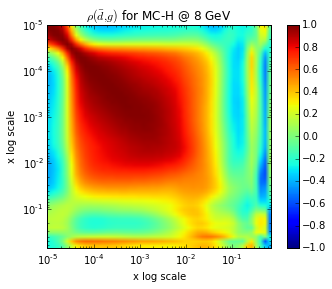

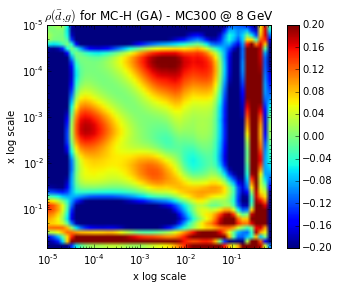

In [13]:
plt.imshow(M5.T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-1, vmax=1)
plt.colorbar()
plt.title(r'$\rho(\bar{d},g)$ for MC-H @ 8 GeV')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('mchdbarg.eps')

plt.figure()
plt.imshow((M5-M1).T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-0.2, vmax=0.2)
plt.colorbar()
plt.title(r'$\rho(\bar{d},g)$ for MC-H (GA) - MC300 @ 8 GeV')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('mchga-cmc300dbarg.eps')

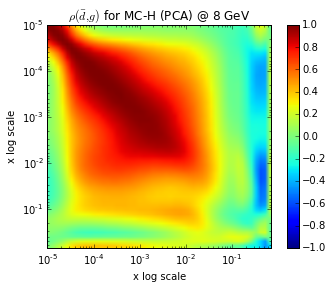

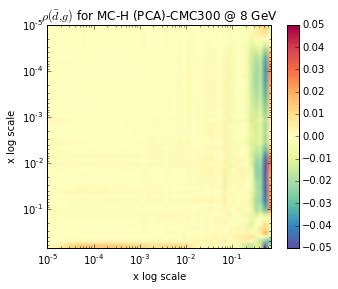

In [14]:
plt.imshow(M6.T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-1, vmax=1)
plt.colorbar()
plt.title(r'$\rho(\bar{d},g)$ for MC-H (PCA) @ 8 GeV')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('mchpcadbarg.eps')

plt.figure()
plt.imshow((M6-M1).T,extent=[x[0], x[-1], x[-1],x[0]], vmin=-0.05, vmax=0.05, cmap=cm)
plt.colorbar()
plt.title(r'$\rho(\bar{d},g)$ for MC-H (PCA)-CMC300 @ 8 GeV')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x log scale')
plt.ylabel('x log scale')
plt.savefig('mchpca-cmc300dbarg.eps')